## TIKZ Plots for the Report

In [ ]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
import os
import matplotlib


# Make sure LaTeX binary is in PATH
os.environ["PATH"] += r";C:\Python_Virtual_Enviroment\venv-scip-opt\Neuer Ordner (2)\miktex\bin\x64"

# Output folder
output_folder = r"C:\Users\TJANWALL\OneDrive - Elektrizitätswerke des Kantons Zürich\Dokumente\03_Overleaf\MA-Jan\plots\tikz"
os.makedirs(output_folder, exist_ok=True)  # create folder if it doesn't exist

# Use LaTeX-style fonts and rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 12,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 12
})

## FCR SOC Range

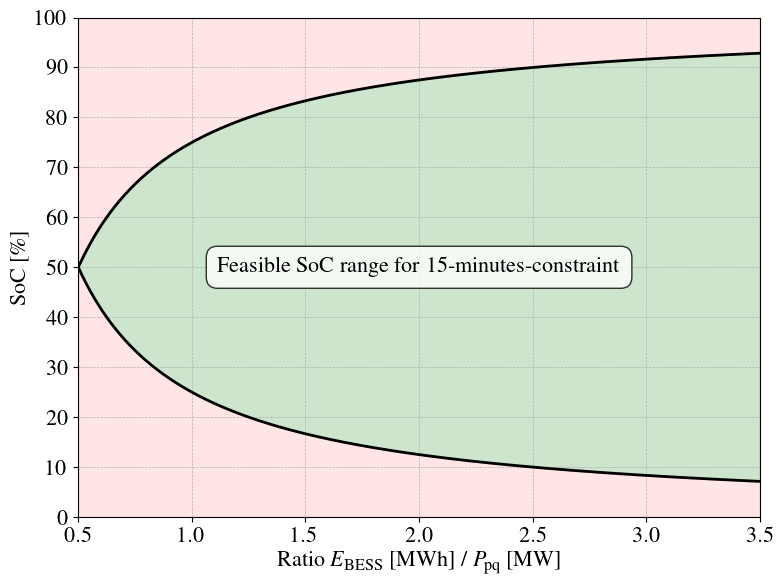

In [6]:
# Ratio range (E / Ppq)
r = np.linspace(0.5, 3.5, 500)

# Equations
SoC_max = 1 - 0.25/r
SoC_min = 0.25/r

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r, SoC_max*100, 'k', linewidth=2, label=r'$SoC_{max}$')
ax.plot(r, SoC_min*100, 'k', linewidth=2, label=r'$SoC_{min}$')

# Fill area
ax.fill_between(r, SoC_min*100, SoC_max*100, color='green', alpha=0.2)
ax.fill_between(r, 0, SoC_min*100, color='red', alpha=0.1)
ax.fill_between(r, SoC_max*100, 100, color='red', alpha=0.1)

# Labels and grid
ax.set_xlabel(r'Ratio $E_{\mathrm{BESS}}$ [MWh] / $P_{\mathrm{pq}}$ [MW]')
ax.set_ylabel(r'SoC [\%]')
ax.set_xlim(0.5, 3.5)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(0.5, 4, 0.5))
ax.set_yticks(np.arange(0, 110, 10))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add text box
ax.text(2, 50,
        r'Feasible SoC range for 15-minutes-constraint',
        ha='center', va='center',
        fontsize=16,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()

# -------------------------------
# Save outputs
tikz_path = os.path.join(output_folder, "FCR_SoC_boundary.tex")
jpg_path = os.path.join(output_folder, "FCR_SoC_boundary.jpg")

tikzplotlib.save(tikz_path)
fig.savefig(jpg_path, dpi=300)  # high-res JPG

plt.show()


## FCR Power response

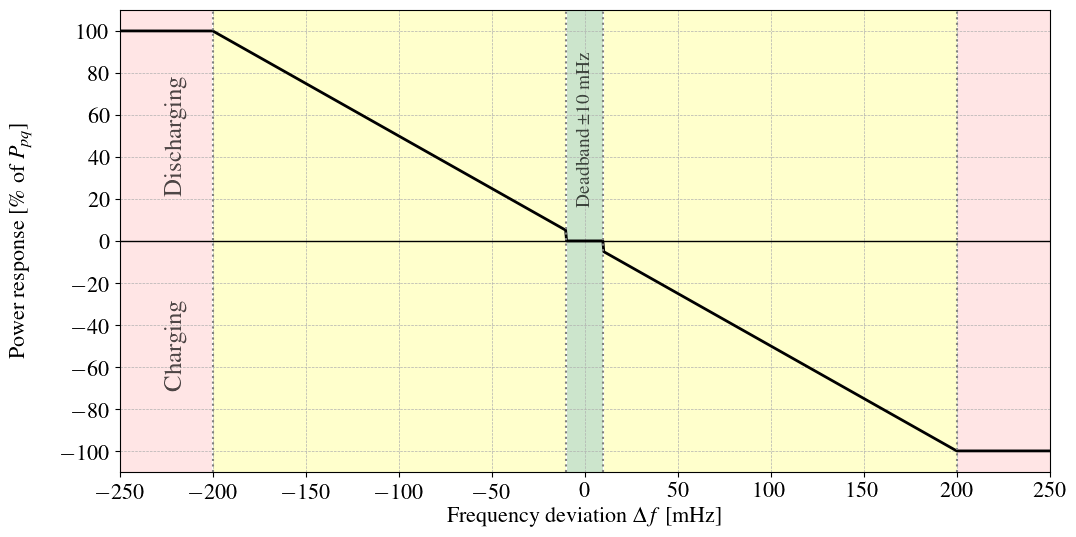

In [7]:
# Frequency deviation range [-0.25Hz, +0.25Hz] -> mHz
f_dev = np.linspace(-0.25, 0.25, 1000)
f_dev_mHz = f_dev * 1000  # convert Hz to mHz

P_response = np.zeros_like(f_dev)

for i, df in enumerate(f_dev):
    if abs(df) < 0.01:
        P_response[i] = 0
    elif abs(df) < 0.2:
        base = 5.0  # % at 10 mHz
        slope = 95.0 / (0.2 - 0.01)
        P_response[i] = -np.sign(df) * (base + slope * (abs(df) - 0.01))
    else:
        P_response[i] = -np.sign(df) * 100 

# --- Create figure ---
fig, ax = plt.subplots(figsize=(12,6))
line1, = ax.plot(f_dev_mHz, P_response, 'k', linewidth=2)

# Background regions (axvspan)
ax.fill_between(f_dev_mHz, -110, 110, where=((f_dev_mHz >= -10) & (f_dev_mHz <= 10)), 
                facecolor='green', alpha=0.2)

ax.fill_between(f_dev_mHz, -110, 110, where=((f_dev_mHz >= -200) & (f_dev_mHz < -10)), 
                facecolor='yellow', alpha=0.2)
ax.fill_between(f_dev_mHz, -110, 110, where=((f_dev_mHz > 10) & (f_dev_mHz <= 200)), 
                facecolor='yellow', alpha=0.2)

ax.fill_between(f_dev_mHz, -110, 110, where=((f_dev_mHz >= -250) & (f_dev_mHz < -200)), 
                facecolor='red', alpha=0.1)
ax.fill_between(f_dev_mHz, -110, 110, where=((f_dev_mHz > 200) & (f_dev_mHz <= 250)), 
                facecolor='red', alpha=0.1)

# Axes and labels
ax.set_xlabel(r'Frequency deviation $\Delta f$ [mHz]')
ax.set_ylabel(r'Power response [\% of $P_{pq}$]', labelpad=20)
ax.set_xlim(-250,250)
ax.set_ylim(-110,110)
ax.set_xticks(np.arange(-250, 300, 50))
ax.set_yticks(np.arange(-100, 120, 20))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Helper lines
ax.axhline(0, color='black', linewidth=1)
ax.axvline(-200, color='gray', linestyle=':')
ax.axvline(200, color='gray', linestyle=':')
ax.axvline(-10, color='gray', linestyle=':')
ax.axvline(10, color='gray', linestyle=':')

# Vertical deadband label
ax.text(0, 53, 'Deadband ±10 mHz', rotation=90, va='center', ha='center', fontsize=14, color='black', alpha=0.7)
ax.text(-220, 50, 'Discharging', rotation=90, va='center', ha='center', fontsize=18, color='black', alpha=0.7)
ax.text(-220, -50, 'Charging', rotation=90, va='center', ha='center', fontsize=18, color='black', alpha=0.7)

# --- Only patch the plot lines (ax.plot returns Line2D objects) ---
for ax in fig.get_axes():
    for line in ax.get_lines():
        if not hasattr(line, "_us_dashSeq") or line._us_dashSeq is None:
            line._us_dashSeq = []
        if not hasattr(line, "_us_dashOffset") or line._us_dashOffset is None:
            line._us_dashOffset = 0.0

# Save outputs
tikz_path = os.path.join(output_folder, "FCR_PWR_responce.tex")
jpg_path = os.path.join(output_folder, "FCR_PWR_responce.jpg")

tikzplotlib.save(tikz_path)

# 2. Post-process to inject width/height
with open(tikz_path, "r") as f:
    tikz_code = f.read()

tikz_code = tikz_code.replace(
    r"\begin{axis}[",
    r"\begin{axis}[width=0.9\textwidth, height=7cm, "
)

with open(tikz_path, "w") as f:
    f.write(tikz_code)

fig.savefig(jpg_path, dpi=300)

plt.show()


## Frequency Response Overview

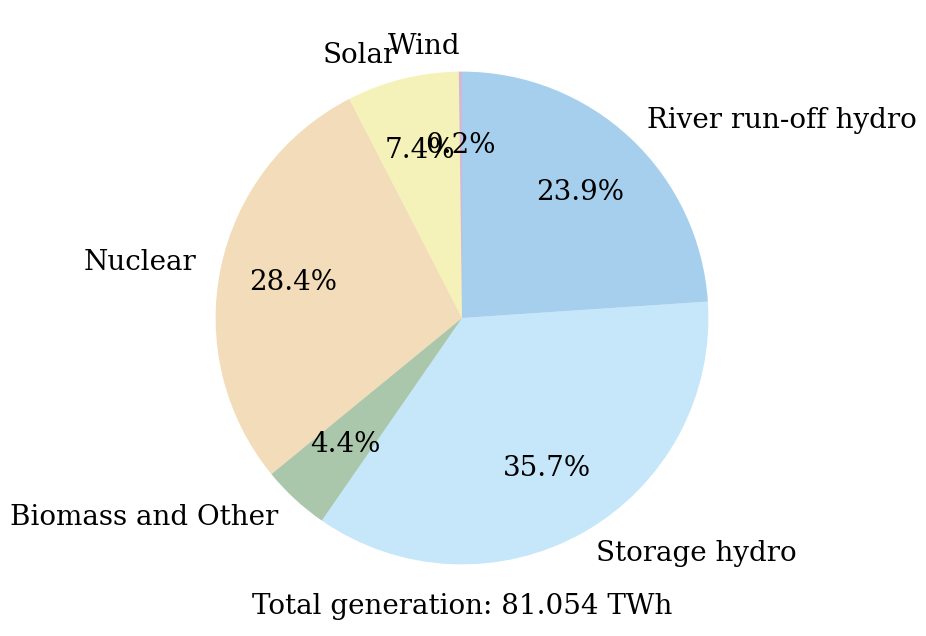

In [8]:
import matplotlib as mpl

# Ensure font works
mpl.rcParams['font.family'] = 'DejaVu Serif'
mpl.rcParams['text.usetex'] = False

# --- Arbitrary generation values in GWh ---
generation = {
    "River run-off hydro": 19403,
    "Storage hydro": 28934,
    "Biomass and Other": 3602,
    "Nuclear": 22983,
    "Solar": 5961,
    "Wind": 171,
}

# --- Prepare data ---
labels = list(generation.keys())
sizes = list(generation.values())
total_gen = sum(sizes)

# Escape LaTeX special characters
def escape_tex(s):
    return s.replace('%', r'\%').replace('&', r'\&').replace('#', r'\#')

# Format labels with percentages safely
labels_safe = [escape_tex(f"{l} ({v/total_gen*100:.1f}\%)") for l, v in zip(labels, sizes)]

colors = [
    "#2288d2",  # blue for river run-off hydro
    "#72c1f2",  # green for storage hydro
    "#2B7530",  # gray for wind
    "#e3a952",  # red for nuclear
    "#e6df52",  # purple for biomass/other
    "#934C91"   # yellow for solar
]

# --- Plot pie chart ---
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    counterclock=False,
    autopct=lambda pct: f"{pct:.1f}%", 
    pctdistance=0.7,
    labeldistance=1.1
)

# Set transparency
for w in wedges:
    w.set_alpha(0.4)

# Make the wedge labels bigger
for t in texts:
    t.set_fontsize(20)       # adjust to desired size
    t.set_color('black')      # optional: ensure visibility

# Style the percentage texts
for t in autotexts:
    t.set_color('black')
    t.set_fontsize(20)
    

# Title and total
#ax.set_title("Electricity Production in Switzerland (2024)", fontsize=14, fontweight='bold')
plt.text(0, -1.2, f"Total generation: {total_gen/1000:2} TWh", ha='center', fontsize=20)

# Save outputs
tikz_path = os.path.join(output_folder, "Swiss_Electricity_Production.tex")
jpg_path = os.path.join(output_folder, "Swiss_Electricity_Production.jpg")

tikzplotlib.save(tikz_path)
fig.savefig(jpg_path, dpi=300)

plt.show()
